In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/Species_clustering_classification.csv')

In [3]:
display(df.head())

,Area,species,species_number,height,crown_width,dbh,health,health_number
0,5,Acerifolia,1,2.5,2.5,20,Good,3
1,4,Acerifolia,1,2.5,2.5,20,Good,3
2,4,Acerifolia,1,2.5,2.5,20,Good,3
3,1,Acerifolia,1,2.5,2.5,20,Poor,4
4,5,Acerifolia,1,2.5,2.5,20,Fair,2


In [4]:
display(df.shape)

(104352, 8)

In [5]:
display(df.isnull().sum())

Area              0
species           0
species_number    0
height            0
crown_width       0
dbh               0
health            0
health_number     0
dtype: int64

In [6]:
display(df.describe())

,Area,species_number,height,crown_width,dbh,health_number
count,104352.000000,104352.000000,104352.000000,104352.000000,104352.000000,104352.000000
mean,3.778049,145.492544,5.471242,4.066990,37.479684,2.932134
std,1.302773,86.532525,4.068125,2.885495,20.676607,0.292295
min,1.000000,1.000000,2.500000,2.500000,20.000000,1.000000
25%,3.000000,63.000000,2.500000,2.500000,20.000000,3.000000
50%,4.000000,150.000000,2.500000,2.500000,40.000000,3.000000
75%,5.000000,209.000000,8.000000,8.000000,40.000000,3.000000
max,5.000000,311.000000,23.000000,23.000000,100.000000,4.000000


In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104352 entries, 0 to 104351
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Area            104352 non-null  int64  
 1   species         104352 non-null  object 
 2   species_number  104352 non-null  int64  
 3   height          104352 non-null  float64
 4   crown_width     104352 non-null  float64
 5   dbh             104352 non-null  int64  
 6   health          104352 non-null  object 
 7   health_number   104352 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.4+ MB


None

<Axes: xlabel='height', ylabel='crown_width'>

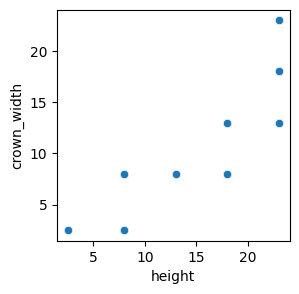

In [8]:
# scatterplot, 2 cols
plt.figure(figsize=(3,3))
sns.scatterplot(x=df['height'], y=df['crown_width'])

<Axes: xlabel='height', ylabel='crown_width'>

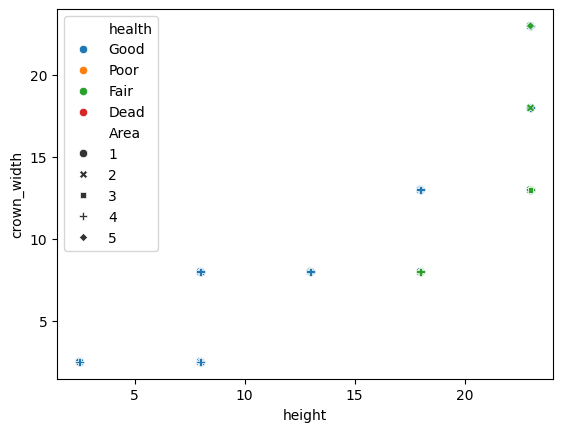

In [9]:
# scatterplot, multiple cols
sns.scatterplot(x=df['height'], y=df['crown_width'], hue=df['health'], style=df['Area'])

Text(0.5, 0, 'health')

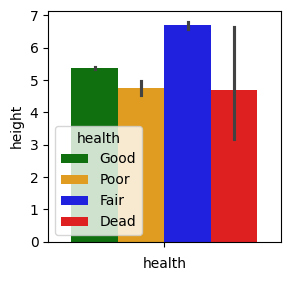

In [10]:
# barplot, x-> categorical, y-> numeric
plt.figure(figsize=(3,3))
plot_colors = {'Good': 'green', 'Fair': 'blue', 'Poor': 'orange', 'Dead': 'red'}
ax = sns.barplot(hue=df['health'], y=df['height'], palette=plot_colors)
ax.set_xlabel('health')

Text(0, 0.5, 'Area')

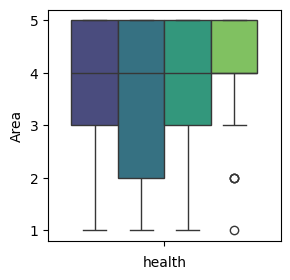

In [11]:
# boxplot x-> categorical, y-> numeric
plt.figure(figsize=(3,3))
ax = sns.boxplot(hue=df['health'], y=df['Area'], palette='viridis', legend=False)
ax.set_xlabel('health')
ax.set_ylabel('Area')

<Axes: xlabel='Area', ylabel='Count'>

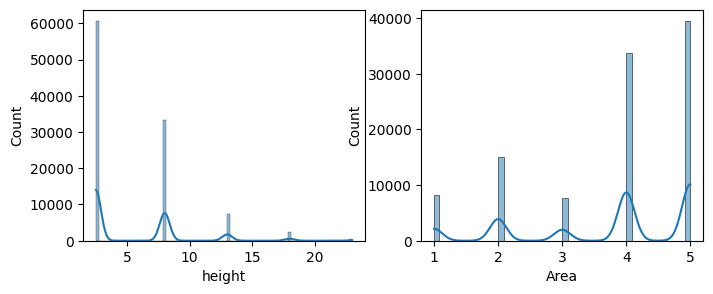

In [12]:
# histplot x->  numeric
fig , axes = plt.subplots(1,2, figsize=(8,3))
ax1, ax2 = axes.flatten()
sns.histplot(df['height'], kde=True, ax=ax1)
sns.histplot(df['Area'], kde=True, ax=ax2)


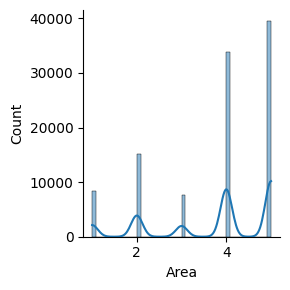

In [13]:
# displot x->  numeric
sns.displot(df['Area'], height=3, kde=True)

<Axes: xlabel='health', ylabel='species'>

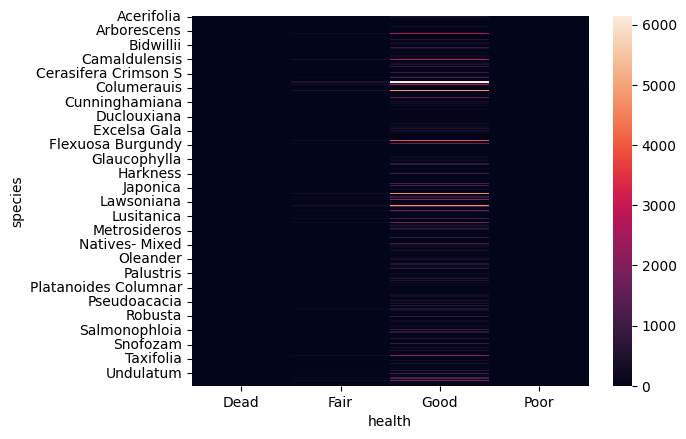

In [14]:
# heatmap, categorical
sns.heatmap(pd.crosstab(df['species'], df['health']))

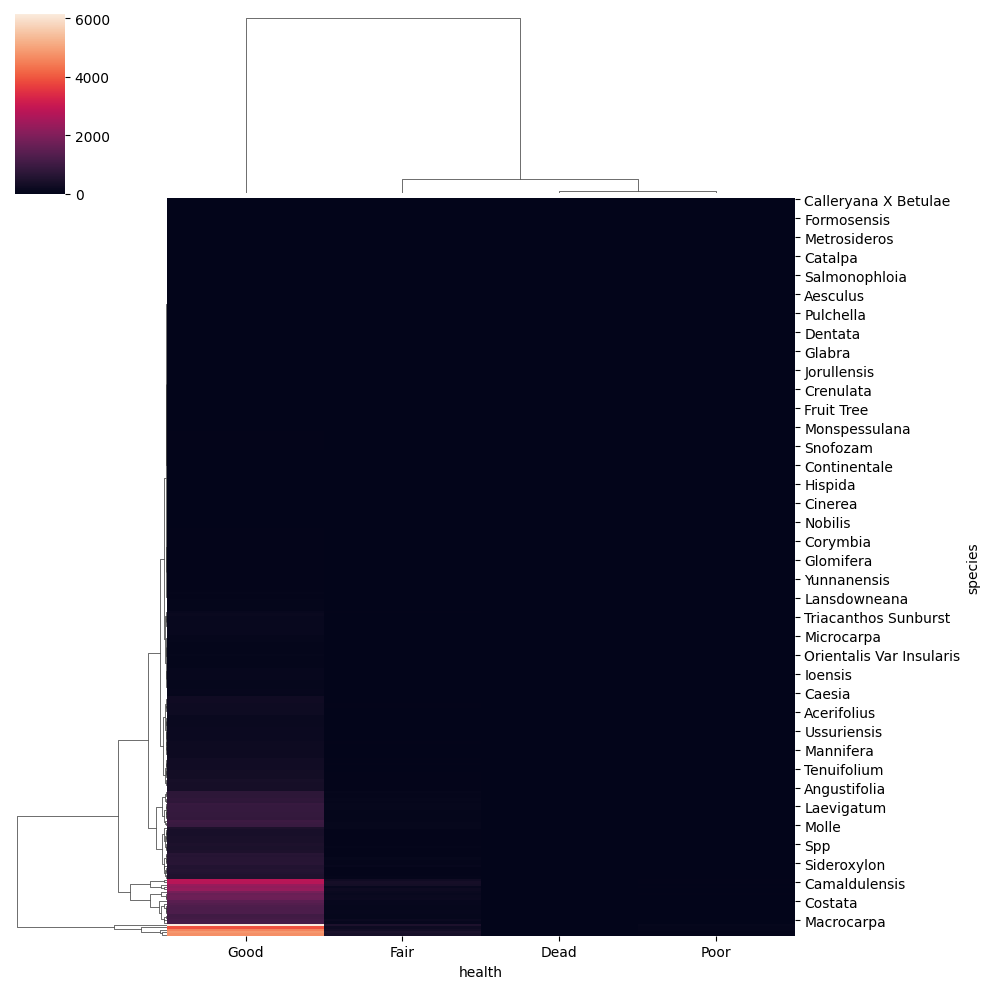

In [15]:
# clustermap, categorical
sns.clustermap(pd.crosstab(df['species'], df['health']))

<Axes: xlabel='Area', ylabel='height'>

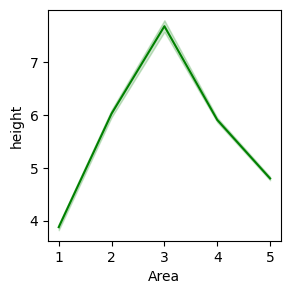

In [24]:
# lineplot , numeric
plt.figure(figsize=(3,3))
sns.lineplot(x=df['Area'], y=df['height'], color='green')

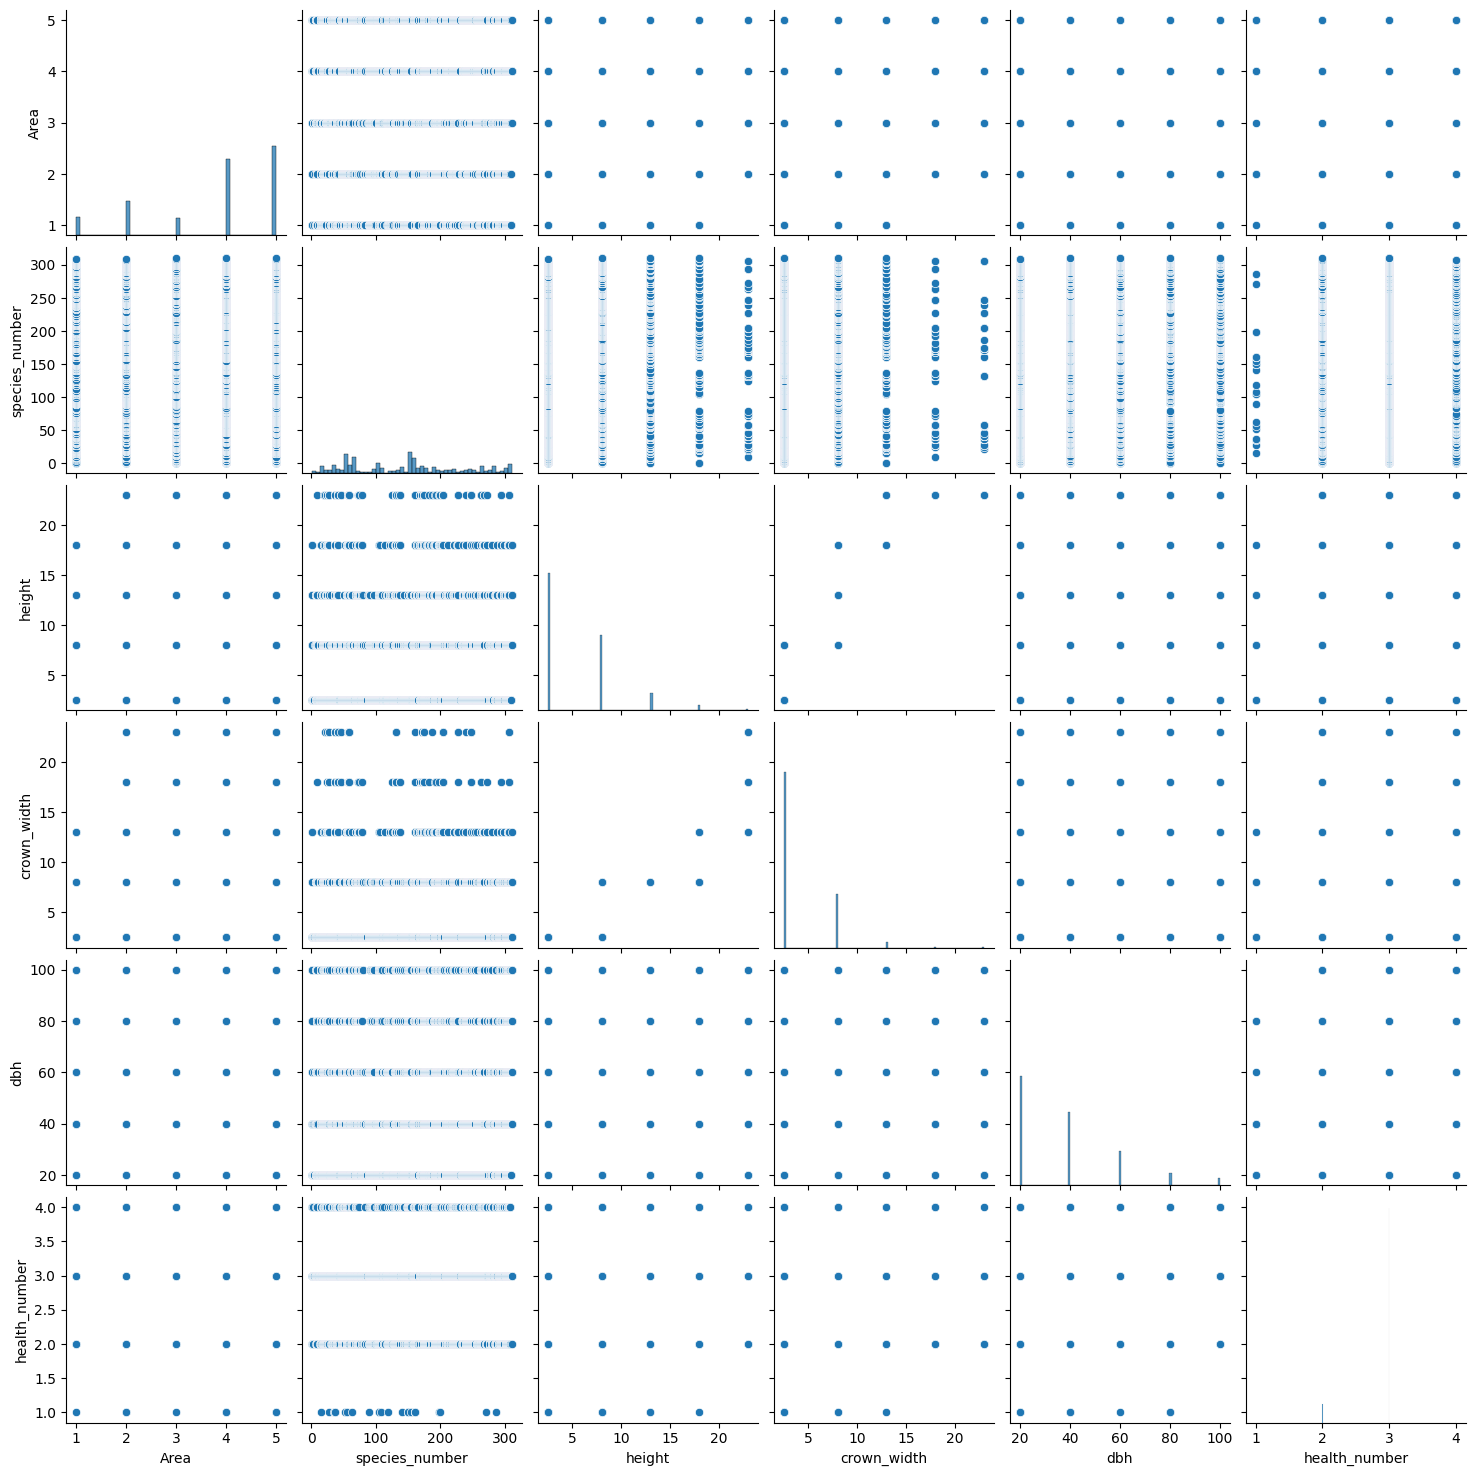

In [17]:
# pairplot, plot whole dataset
sns.pairplot(df)

In [ ]:
# pivot table
display(df.pivot_table(index='health', values='height', columns='Area',aggfunc='mean'))

Area,1,2,3,4,5
health,,,,,
Dead,2.500000,2.500000,2.500000,4.888889,5.650000
Fair,3.920315,7.640244,10.343381,6.983067,5.631687
Good,3.883296,5.890464,7.387719,5.820726,4.736108
Poor,3.299145,5.142442,6.901099,5.028963,4.344706


<Figure size 300x300 with 0 Axes>

<Axes: xlabel='Area', ylabel='health'>

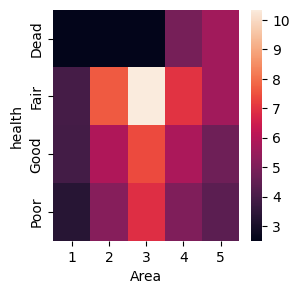

In [33]:
plt.figure(figsize=(3,3))
sns.heatmap(df.pivot_table(index='health', values='height', columns='Area',aggfunc='mean'))